### Validacion Cruzada


## Curso de Analitica y Ciencia de Datos

<t> Prof. Rodrigo Esquivel - 2024 <br> 
    Modulo 4  Validacion Cruzada <br> 
    </t>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
from sklearn.datasets import load_iris,load_diabetes
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score,mean_absolute_percentage_error,make_scorer
import seaborn as sns


   ### Validacion Cruzada

> En este momento conocemos una forma de probar nuestros modelos y es utilizando el siguiente procedimiento:


* El set de datos se divide en 2, usualmente 80% para entreno, 20% para pruebas.
* Se entrena el modelo con el set de datos especificado para este fin utilizando los parametros especificados.
* Se prueba con el set de datos especificado para este fin.
* Se obtienen los resultados

> Esta forma de validacion es usualmente conocida como <b> Validation Set approach </b> y tiene las siguientes ventajas:

* Simple y fácil de implementar.
* Útil cuando se tienen suficientes datos.

 > Sin embargo posee las siguientes desventajas:

* Estimación del error puede ser muy variable, ya que depende de cómo se dividan los datos.
* Reduce la cantidad de datos para entrenamiento, lo que puede ser problemático en conjuntos pequeños.
* No aprovecha todos los datos eficientemente (a diferencia de métodos como Cross-Validation).

 ### ¿Como funciona la  Validacion Cruzada ? 

 >  Es un metodo de resampleo que busca que todo el set de datos participe en el proceso de entrenamiento. Esto se alcanza diviendo el conjunto datos original en ‘k’ subconjuntos de igual tamaño. Luego, de manera iterativa, se utiliza uno de los pliegues como conjunto de validación, mientras que los ‘k-1’ pliegues restantes se usan como conjunto de entrenamiento. Este proceso se repite ‘k’ veces, utilizando cada pliegue como conjunto de validación exactamente una vez. Finalmente, los resultados de estas ‘k’ iteraciones se promedian para obtener una única estimación del rendimiento del modelo.

### ¿Cuantos Pliegues escoger? 

 >  El numero de pliegues o divisiones que escojamos al momento de realizar el proceso de  validación cruzada no es trivial.  Se tiene que  encontrar un balance entre Sesgo y Varianza

### ¿Que es Sesgo, Que es Varianza?

 > Sesgo es la forma en que simplifica o generaliza un problema tu modelo. Se busca que  los modelos sean capaces  generalizar los problemas sin embargo demasiado sesgo en un modelo conduce a la inhabilidad del sistema de poder captar nuevas tendencias en los datos y por ende se traduce en pobre desempeño aun en entrenamiento.

 > Varianza, es la forma en que el modelo es capaz de adaptarse a nuevos datos presentados, se espera que el modelo tenga adaptabilidad sin embargo mucho de esta conduce a que el modelo absorba hasta el ruido random de los datos  pero al exponerse a nuevos no logra generalizar. Esto se traduce en excelente desempeño  en  entreno pero uno muy pobre en prueba.

 > Lo ideal es encontrar el balance entre Sesgo y Varianza en la creación de nuestros modelos: Uno que sea capaz de generalizar para adaptarse a nuevos datos pero a la vez que pueda tener el sesgo suficiente para  mantener fuera del modelo la mayor cantidad  de  ruido de los datos.  Al momento de escoger el número de pliegues que usaremos en la validación cruzada tenemos en cuenta también este balance.

### ¿Que número escoger?

* K pequeño (2-5): Útil para datasets grandes, pero riesgo de ↑ sesgo.

* K grande (10 o LOO): Ideal para datasets pequeños, pero ↑ varianza.

* K=5 o K=10: Punto óptimo en la mayoría de casos.

### Ejemplo

Errores R2 de cada fold: [0.31748693 0.49839788 0.44602696 0.3193515  0.50525961 0.52198252
 0.4545959  0.46408172 0.56491937 0.61104081]
Media de los errores r2: 0.4703
Desviación estándar de los errores MAPE: 0.0897


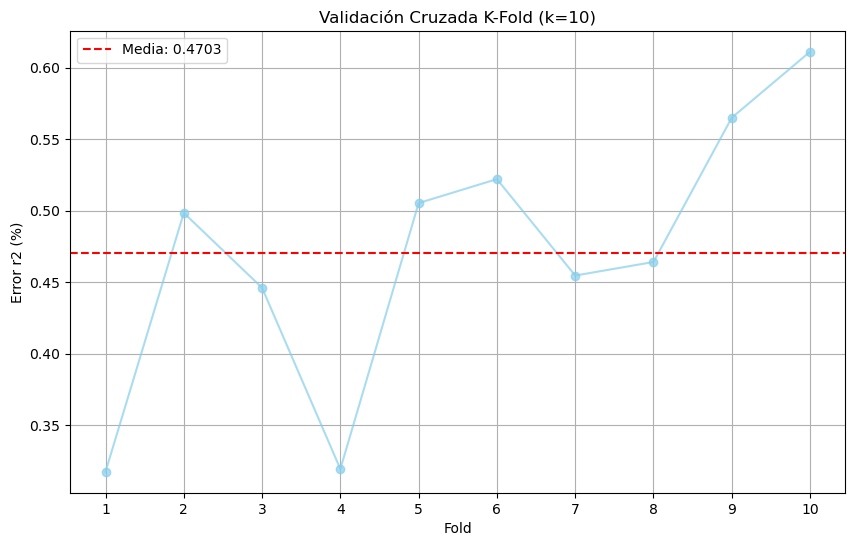

In [2]:

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def validar_k_fold(model, X, y, k):
    # Configurar la validación cruzada K-Fold
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    
    
    # Evaluar el modelo usando validación cruzada
    r2_score = cross_val_score(model, X, y, cv=kf, scoring="r2")
    
    # Imprimir los resultados
    print(f'Errores R2 de cada fold: {r2_score}')
    print(f'Media de los errores r2: {np.mean(r2_score):.4f}')
    print(f'Desviación estándar de los errores MAPE: {np.std(r2_score):.4f}')
    
    # Crear la gráfica de líneas
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, k+1), r2_score, marker='o', linestyle='-', color='skyblue', alpha=0.7)
    plt.xlabel('Fold')
    plt.ylabel('Error r2 (%)')
    plt.title(f'Validación Cruzada K-Fold (k={k})')
    plt.xticks(range(1, k+1))
    plt.axhline(np.mean(r2_score), color='r', linestyle='--', label=f'Media: {np.mean(r2_score):.4f}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Cargar el conjunto de datos
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Definir el modelo
model = LinearRegression()

# Número de folds
k = 10

# Llamar a la función para validar
validar_k_fold(model, X, y, k)


<font color="Green"> Explicación</font>

> Se divide el sample en 10 partes( o Folds), El número 5 utilizado es un número  sacado a criterio en la etapa de validación de datos. Con el modelo dividido, se usa entonces la instrucción cross_vals_core para realizar los distintos cruces de valores entre valores reales y predichos asi como el metodo que vamos a usar, en este caso R2.  

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

def validar_k_fold(model, X, y, k):
    # Listas para almacenar las matrices de confusión y las precisiones
    conf_matrices = []
    accuracies = []

    # Configurar la validación cruzada K-Fold
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    y_pred = cross_val_predict(model, X, y, cv=5)
    print(confusion_matrix(y, y_pred))
    print("###############################")
    print(classification_report(y, y_pred))
    print("###############################")
    # Promediar las matrices de confusión
 

titanic_df = sns.load_dataset('titanic')

# Eliminar filas con valores nulos en la columna 'age'
titanic_df.dropna(subset=['age'], inplace=True)

# Reindexar el DataFrame
titanic_df.reset_index(drop=True, inplace=True)

# Definir características (X) y objetivo (y)
X = titanic_df[['pclass', 'age', 'sibsp', 'parch', 'fare']]
y = titanic_df['survived']

# Crear el modelo
model = LogisticRegression(max_iter=200)

# Llamar a la función para validar
k = 5
validar_k_fold(model, X, y, k)


[[347  77]
 [145 145]]
###############################
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       424
           1       0.65      0.50      0.57       290

    accuracy                           0.69       714
   macro avg       0.68      0.66      0.66       714
weighted avg       0.68      0.69      0.68       714

###############################


 ### Taller

* Realizar validacion cruzada para los ejemplos dados en clase
* Realizar Validacion cruzada para los ejemplos a dar en clase en este momento.